In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.metrics import confusion_matrix

In [3]:
data_frame = pd.read_csv('/content/drive/My Drive/RESEARCH/Ovarian_Cancer_MDPI/OC_Genarel_Chem.csv')
data_frame = data_frame.iloc[: , :-1]
data_frame.head

<bound method NDFrame.head of      Age     AG   ALB  ALP  ALT  AST   BUN    Ca     CL  CO2CP  ...   GLU.  \
0     47  19.36  45.4   56   11   24  5.35  2.48  107.4   19.9  ...   4.67   
1     61  23.98  39.9   95    9   13  3.21  2.62  100.1   22.3  ...  10.50   
2     39  18.40  45.4   77    9   18  3.80  2.57  102.6   22.2  ...   4.64   
3     45  16.60  39.2   26   16   17  5.27  2.35  103.2   24.0  ...   4.76   
4     45  19.97  35.0   47   21   27  4.89  2.48   99.6   26.2  ...   4.07   
..   ...    ...   ...  ...  ...  ...   ...   ...    ...    ...  ...    ...   
344   52  20.91  48.6   65   40   30  4.29  2.81   98.1   25.9  ...   5.13   
345   37  12.14  46.1   49    9   20  3.12  2.29  103.6   25.0  ...   4.59   
346   59  19.23  45.8   83    9   16  4.38  2.65  102.3   27.1  ...   5.90   
347   30  27.22  47.8   64   26   22  3.61  2.82   93.1   23.1  ...   5.59   
348   39  13.00  44.9   68    7   13  4.38  2.58  101.7   29.5  ...   4.94   

     IBIL     K    Mg     Na  PHO

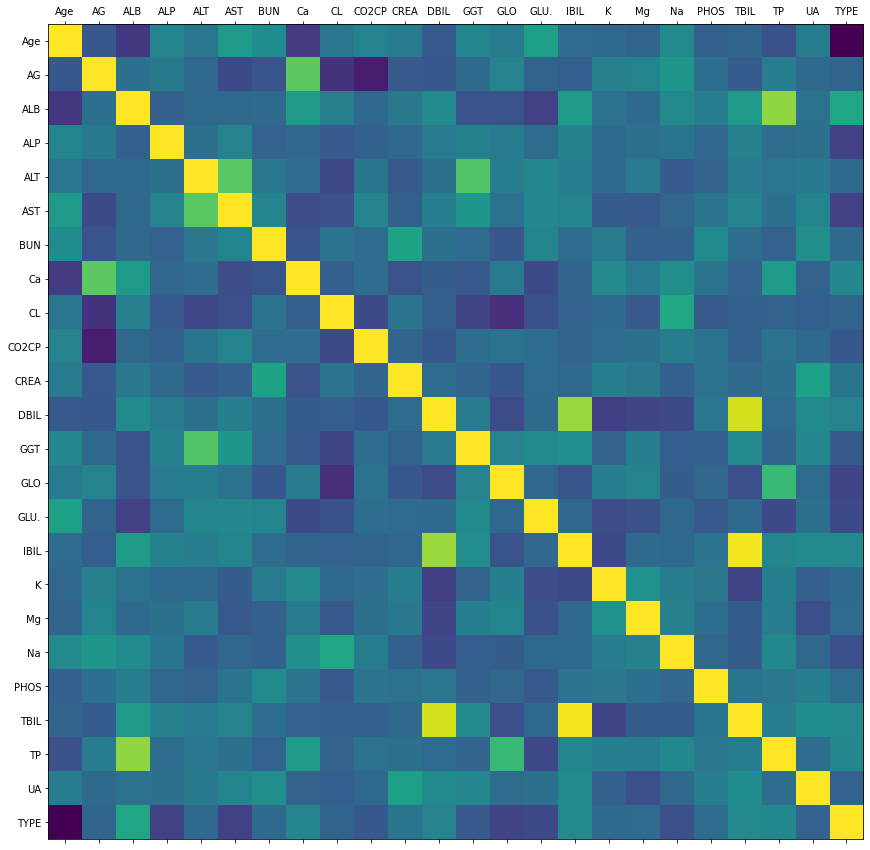

81.38% in training set
20.63% in test set


In [4]:
from sklearn.model_selection import train_test_split

def corr_heatmap(data_frame, size=11):
  correlation = data_frame.corr()
  fig, heatmap = plt.subplots(figsize=(size, size))
  heatmap.matshow(correlation)
  plt.xticks(range(len(correlation.columns)), correlation.columns)
  plt.yticks(range(len(correlation.columns)), correlation.columns)
  plt.show()

corr_heatmap(data_frame,15)

clm = data_frame.columns
feature_column_names = clm[:-1]

predicted_class_name = ['TYPE']

X = data_frame[feature_column_names].values
y = data_frame[predicted_class_name].values

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2)
X, y = sm.fit_resample(X, y) 

split_test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)

print("{0:0.2f}% in training set".format((len(X_train)/len(data_frame.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(data_frame.index)) * 100))

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
X_train.shape

(284, 23)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import sys,random
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import sklearn.metrics as metrics


param_dict ={
             "criterion":['gini','entropy'],
             "max_depth":(150, 155, 160),
             "min_samples_split":range(1,10),
             "min_samples_leaf":range(1,5)
 }

decision_tree = DecisionTreeClassifier(random_state=42)

grid = GridSearchCV(decision_tree,
                        param_grid=param_dict,
                        cv=5,
                        verbose=1,
                        n_jobs=-1) 

grid.fit(X_train, y_train)

m_best = grid.best_estimator_

y_t = m_best.predict(X_train)
train_acc = metrics.accuracy_score(y_train, y_t)

y_pred = m_best.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
test_acc = metrics.accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print ("Train accuracy: {0:.4f}".format(train_acc))
print ("Test accuracy: {0:.4f}".format(test_acc))
print ("Precision: {0:.4f}".format(precision))
print ("Recall: {0:.4f}".format(recall))
print ("F1: {0:.4f}".format(f1))
print ("AUC: {0:.4f}".format(auc))
print ("Log Loss: {0:.4f}".format(logloss))

from sklearn.metrics import confusion_matrix

print('Training confusion matrix')
print(confusion_matrix(y_train, y_t))
print('Testing confusion matrix')
print(confusion_matrix(y_test, y_pred))

print ("Feature Importance")

importances = m_best.feature_importances_
for i in importances:
    print(i)
    
pred_prob1 = m_best.predict_proba(X_test)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Train accuracy: 0.9542
Test accuracy: 0.6806
Precision: 0.6944
Recall: 0.6757
F1: 0.6849
AUC: 0.6807
Log Loss: 11.0333
Training confusion matrix
[[138   5]
 [  8 133]]
Testing confusion matrix
[[24 11]
 [12 25]]
Feature Importance
0.27083667292662933
0.09212780950492018
0.13128258257471873
0.05475552438420024
0.029709370074147493
0.0
0.04878497443822812
0.0408388217841337
0.0
0.031136427023294968
0.037087008521074584
0.0
0.0
0.02815229707989626
0.0
0.07465229107660083
0.0
0.04567659473888966
0.09036762112870991
0.0
0.0
0.007855239896513743
0.01673676484804223


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a flo

In [7]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 5,
    verbose=True
)

grid_search.fit(X_train, y_train)

grid_search.best_estimator_

m_best = grid_search.best_estimator_

y_t = m_best.predict(X_train)
train_acc = metrics.accuracy_score(y_train, y_t)

y_pred = m_best.predict(X_test)

test_acc = metrics.accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print ("Train accuracy: {0:.4f}".format(train_acc))
print ("Test accuracy: {0:.4f}".format(test_acc))
print ("Precision: {0:.4f}".format(precision))
print ("Recall: {0:.4f}".format(recall))
print ("F1: {0:.4f}".format(f1))
print ("AUC: {0:.4f}".format(auc))
print ("Log Loss: {0:.4f}".format(logloss))

print('Training confusion matrix')
print(confusion_matrix(y_train, y_t))
print('Testing confusion matrix')
print(confusion_matrix(y_test, y_pred))

print ("Feature Importance")

importances = m_best.feature_importances_
for i in importances:
    print(i)

pred_prob2 = m_best.predict_proba(X_test)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Train accuracy: 0.9683
Test accuracy: 0.7639
Precision: 0.7632
Recall: 0.7838
F1: 0.7733
AUC: 0.7633
Log Loss: 8.1551
Training confusion matrix
[[138   5]
 [  4 137]]
Testing confusion matrix
[[26  9]
 [ 8 29]]
Feature Importance
0.2182715
0.020413037
0.07040843
0.043190103
0.034274586
0.034099843
0.04663272
0.04403565
0.023805186
0.02597634
0.027693015
0.02720016
0.016841585
0.05111283
0.04493561
0.057637215
0.022085568
0.028269565
0.0451692
0.02318139
0.034613922
0.03426892
0.025883608


In [8]:
import pandas as pd 
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

m_best = CV_rfc.best_estimator_

y_t = m_best.predict(X_train)
train_acc = metrics.accuracy_score(y_train, y_t)

y_pred = m_best.predict(X_test)

test_acc = metrics.accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print ("Train accuracy: {0:.4f}".format(train_acc))
print ("Test accuracy: {0:.4f}".format(test_acc))
print ("Precision: {0:.4f}".format(precision))
print ("Recall: {0:.4f}".format(recall))
print ("F1: {0:.4f}".format(f1))
print ("AUC: {0:.4f}".format(auc))
print ("Log Loss: {0:.4f}".format(logloss))

print('Training confusion matrix')
print(confusion_matrix(y_train, y_t))
print('Testing confusion matrix')
print(confusion_matrix(y_test, y_pred))

print ("Feature Importance")

importances = m_best.feature_importances_
for i in importances:
    print(i)
    
pred_prob3 = m_best.predict_proba(X_test)

Train accuracy: 0.9613
Test accuracy: 0.8056
Precision: 0.7949
Recall: 0.8378
F1: 0.8158
AUC: 0.8046
Log Loss: 6.7160
Training confusion matrix
[[135   8]
 [  3 138]]
Testing confusion matrix
[[27  8]
 [ 6 31]]
Feature Importance
0.1960309568165544
0.023354514447792105
0.1185926543663726
0.07507368877990578
0.02389954994869083
0.041451083054298704
0.02156564162098317
0.03448783686886239
0.024101800884762138
0.03567125393274516
0.021299611806287082
0.019219774658328928
0.018129373765436493
0.05209524543989655
0.025578961948669567
0.04115812106332915
0.017424064881586293
0.01978849056774504
0.06281421161025187
0.022039786059725553
0.03675982707219179
0.052829417781170195
0.01663413262441423


In [9]:
from sklearn.model_selection import GridSearchCV 
from sklearn import svm

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
grid = GridSearchCV(svm.SVC(kernel='linear'), param_grid, refit = True, verbose = 3) 
  

grid.fit(X_train, y_train) 

m_best = grid.best_estimator_

y_t = m_best.predict(X_train)
train_acc = metrics.accuracy_score(y_train, y_t)

y_pred = m_best.predict(X_test)

test_acc = metrics.accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print ("Train accuracy: {0:.4f}".format(train_acc))
print ("Test accuracy: {0:.4f}".format(test_acc))
print ("Precision: {0:.4f}".format(precision))
print ("Recall: {0:.4f}".format(recall))
print ("F1: {0:.4f}".format(f1))
print ("AUC: {0:.4f}".format(auc))
print ("Log Loss: {0:.4f}".format(logloss))

print('Training confusion matrix')
print(confusion_matrix(y_train, y_t))
print('Testing confusion matrix')
print(confusion_matrix(y_test, y_pred))

print ("Feature Importance")

importances = m_best.coef_[0]
for i in importances:
    print(i)
    
#pred_prob4 = m_best.predict_proba(X_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.860 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.789 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.772 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.825 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.804 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.860 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.789 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.772 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.825 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.804 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.860 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
lr=LogisticRegression(random_state=42)
model_lr = GridSearchCV(lr, param_grid=grid_values)

model_lr.fit(X_train,y_train)

m_best = model_lr.best_estimator_

y_t = m_best.predict(X_train)
train_acc = metrics.accuracy_score(y_train, y_t)

y_pred = m_best.predict(X_test)

test_acc = metrics.accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print ("Train accuracy: {0:.4f}".format(train_acc))
print ("Test accuracy: {0:.4f}".format(test_acc))
print ("Precision: {0:.4f}".format(precision))
print ("Recall: {0:.4f}".format(recall))
print ("F1: {0:.4f}".format(f1))
print ("AUC: {0:.4f}".format(auc))
print ("Log Loss: {0:.4f}".format(logloss))

print('Training confusion matrix')
print(confusion_matrix(y_train, y_t))
print('Testing confusion matrix')
print(confusion_matrix(y_test, y_pred))

print ("Feature Importance")

importances = m_best.coef_[0]
for i in importances:
    print(i)
    
#pred_prob5 = m_best.predict_proba(X_test)

Train accuracy: 0.8486
Test accuracy: 0.7917
Precision: 0.7500
Recall: 0.8919
F1: 0.8148
AUC: 0.7888
Log Loss: 7.1957
Training confusion matrix
[[119  24]
 [ 19 122]]
Testing confusion matrix
[[24 11]
 [ 4 33]]
Feature Importance
-1.0153655169386708
-1.3664272287676609
0.4496362802697721
-0.8376070605172156
0.871474310956073
-1.183631356583594
0.32083285990026444
0.9962403152879782
-0.8645562920127696
-0.8177860527454539
0.11575043141463585
-0.41620945301512796
-0.03044193271517587
-0.7105831564383217
0.11059563763825507
0.5580050729328541
-0.05842333428976825
0.135887559616959
0.09795704126348168
-0.048134403593753344
0.25437411368199375
0.3549258322357667
0.02500652718878488


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

In [11]:
import lightgbm as lgb
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import sys,random
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import sklearn.metrics as metrics

params = {
    'application': 'binary', 
    'boosting': 'gbdt', 
    'num_iterations': 100, 
    'learning_rate': 0.05,
    'num_leaves': 62,
    'device': 'cpu', 
    'max_depth': -1, 
    'max_bin': 510, 
    'lambda_l1': 5, 
    'lambda_l2': 10, 
    'metric' : 'binary_error',
    'subsample_for_bin': 200, 
    'subsample': 1,
    'colsample_bytree': 0.8,
    'min_split_gain': 0.5, 
    'min_child_weight': 1, 
    'min_child_samples': 5
}

mdl = lgb.LGBMClassifier(boosting_type= 'gbdt', 
          objective = 'binary', 
          n_jobs = 5, 
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'], 
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'], 
          min_split_gain = params['min_split_gain'], 
          min_child_weight = params['min_child_weight'], 
          min_child_samples = params['min_child_samples'])

mdl.get_params().keys()

gridParams = {
    'learning_rate': [0.005, 0.01],
    'n_estimators': [8,16,24],
    'num_leaves': [6,8,12,16],
    'boosting_type' : ['gbdt', 'dart'], 
    'objective' : ['binary'],
    'max_bin':[255, 510], 
    'random_state' : [500],
    'colsample_bytree' : [0.64, 0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

grid = GridSearchCV(mdl, gridParams, verbose=1, cv=5, n_jobs=-1)
# Run the grid
grid.fit(X, y)

params['colsample_bytree'] = grid.best_params_['colsample_bytree']
params['learning_rate'] = grid.best_params_['learning_rate'] 
params['max_bin'] = grid.best_params_['max_bin']
params['num_leaves'] = grid.best_params_['num_leaves']
params['reg_alpha'] = grid.best_params_['reg_alpha']
params['reg_lambda'] = grid.best_params_['reg_lambda']
params['subsample'] = grid.best_params_['subsample']

d_train = lgb.Dataset(X_train, label=y_train)
d_test = lgb.Dataset(X_test, label=y_test) 

watchlist = [d_train, d_test]

model = lgb.train(params, train_set=d_train, num_boost_round=1000, valid_sets=watchlist, early_stopping_rounds=50, verbose_eval=4)

y_t = model.predict(X_train)
y_t = np.where(y_t > 0.5, 1, 0)

train_acc = metrics.accuracy_score(y_train, y_t)

y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)

test_acc = metrics.accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)

print ("Train accuracy: {0:.4f}".format(train_acc))
print ("Test accuracy: {0:.4f}".format(test_acc))
print ("Precision: {0:.4f}".format(precision))
print ("Recall: {0:.4f}".format(recall))
print ("F1: {0:.4f}".format(f1))
print ("AUC: {0:.4f}".format(auc))
print ("Log Loss: {0:.4f}".format(logloss))

print('Training confusion matrix')
print(confusion_matrix(y_train, y_t))
print('Testing confusion matrix')
print(confusion_matrix(y_test, y_pred))

print ("Feature Importance")

importances=model.feature_importance(importance_type='gain')
for i in importances:
    print(i)
    
#pred_prob7 = model.predict_proba(X_test)

Fitting 5 folds for each of 3456 candidates, totalling 17280 fits
Training until validation scores don't improve for 50 rounds.
[4]	training's binary_error: 0.228873	valid_1's binary_error: 0.361111
[8]	training's binary_error: 0.239437	valid_1's binary_error: 0.375
[12]	training's binary_error: 0.225352	valid_1's binary_error: 0.347222
[16]	training's binary_error: 0.225352	valid_1's binary_error: 0.361111
[20]	training's binary_error: 0.211268	valid_1's binary_error: 0.361111
[24]	training's binary_error: 0.204225	valid_1's binary_error: 0.361111
[28]	training's binary_error: 0.207746	valid_1's binary_error: 0.361111
[32]	training's binary_error: 0.207746	valid_1's binary_error: 0.347222
[36]	training's binary_error: 0.200704	valid_1's binary_error: 0.361111
[40]	training's binary_error: 0.204225	valid_1's binary_error: 0.361111
[44]	training's binary_error: 0.200704	valid_1's binary_error: 0.375
[48]	training's binary_error: 0.197183	valid_1's binary_error: 0.361111
[52]	training's 

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


In [12]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from matplotlib import pyplot

# Create a RandomForestClassifier object
baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=42)

baseline.fit(X_train, y_train)

gbm_predict_train = baseline.predict(X_train)

#get accuracy
gbm_accuracy = metrics.accuracy_score(y_train, gbm_predict_train)

#print accuracy
print ("GBM training Accuracy: {0:.4f}".format(gbm_accuracy))

gbm_predict_test = baseline.predict(X_test)

#get accuracy
gbm_accuracy_testdata = metrics.accuracy_score(y_test, gbm_predict_test)

#print accuracy
print ("GBM testing Accuracy: {0:.4f}".format(gbm_accuracy_testdata))

from sklearn.metrics import log_loss
logloss = log_loss(y_test, gbm_predict_test)
print ("GBM Log Loss: {0:.4f}".format(logloss))

from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, gbm_predict_test)
print ("GBM AUC: {0:.4f}".format(auc))

importances = baseline.feature_importances_

#Sort it
print ("GBM Sorted Feature Importance:")
sorted_feature_importance = sorted(zip(importances, list(feature_column_names)), reverse=True)
#print(importances)
print (sorted_feature_importance)
sorted_importances = importances.sort()

print('Training confusion matrix')
print(confusion_matrix(y_train, gbm_predict_train))
print('Testing confusion matrix')
print(confusion_matrix(y_test, gbm_predict_test))

print ("Confusion Matrix for GBM")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, gbm_predict_test, labels=[1, 0])))

print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, gbm_predict_test, labels=[1, 0])))

for i in importances:
    print(i)

#pred_prob8 = baseline.predict_proba(X_test)

GBM training Accuracy: 0.9965
GBM testing Accuracy: 0.7500
GBM Log Loss: 8.6348
GBM AUC: 0.7498
GBM Sorted Feature Importance:
[(0.27593512063450465, 'Age'), (0.10420585781078873, 'ALB'), (0.06828033511350698, 'ALP'), (0.06653957143651655, 'Na'), (0.06456131272053747, 'GLO'), (0.04277076032583591, 'TBIL'), (0.039118753659452644, 'BUN'), (0.038658845603800854, 'Ca'), (0.03625134556398476, 'IBIL'), (0.03555577947112899, 'AST'), (0.02638189972719432, 'ALT'), (0.02470309857715365, 'AG'), (0.02458304073213561, 'GGT'), (0.0239430388028546, 'CO2CP'), (0.019837218776357093, 'GLU.'), (0.01924674310680167, 'PHOS'), (0.015653618306788613, 'CREA'), (0.014224962878892992, 'Mg'), (0.013944178313810621, 'TP'), (0.01262523414670026, 'DBIL'), (0.011613374160454921, 'UA'), (0.011401967327406972, 'CL'), (0.009963942803390953, 'K')]
Training confusion matrix
[[142   1]
 [  0 141]]
Testing confusion matrix
[[26  9]
 [ 9 28]]
Confusion Matrix for GBM
[[28  9]
 [ 9 26]]

Classification Report

              

In [13]:
from sklearn.metrics import roc_curve


# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
#fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
#fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5, pos_label=1)
#fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)
#fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7, pos_label=1)
#fpr8, tpr8, thresh8 = roc_curve(y_test, pred_prob8, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

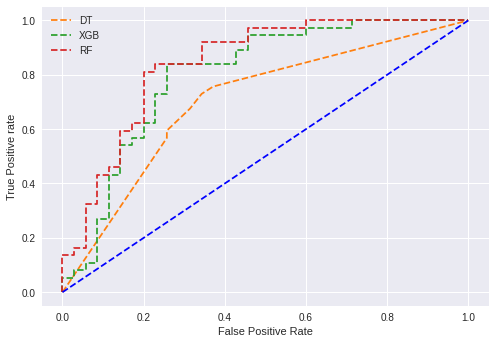

In [14]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='#ff7f0e', label='DT')
plt.plot(fpr2, tpr2, linestyle='--',color='#2ca02c', label='XGB')
plt.plot(fpr3, tpr3, linestyle='--',color='#d62728', label='RF')
#plt.plot(fpr4, tpr4, linestyle='--',color='#bcbd22', label='GBM')
#plt.plot(fpr5, tpr5, linestyle='--',color='#8c564b', label='SVM')
#plt.plot(fpr6, tpr6, linestyle='--',color='#1f77b4', label='LGBM')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();